# EX10. Îâ¥Ïä§Í∏∞ÏÇ¨ ÏöîÏïΩÌï¥Î≥¥Í∏∞

## Step 1. Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÌïòÍ∏∞

In [2]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [4]:
data.sample(10)

headlines  \
2800   Snapdeal to face prosecution in K'taka for ill...   
81661  I can't be as bindaas as my father Jackie Shro...   
24258  Policeman mistakes cycling champ for fan, knoc...   
30820   Smart radar startup MetaWave raises $10 million    
35157  Ex-FBI chief's book 'poorly executed PR stunt'...   
91450  India successfully test fires Agni-III ballist...   
91221  Indian-American jailed for over 5 yrs, loses U...   
52976  World Bank projects growth rate of 7.3% for In...   
60585  Want seven children and seven Ballon d'Or awar...   
10187  Kohli, Rohit gave me freedom to express myself...   

                                                    text  
2800   Karnataka government has permitted authorities...  
81661  Actor Tiger Shroff has said that while his fat...  
24258  Reigning champion Chris Froome was knocked off...  
30820  US-based smart radar startup MetaWave has rais...  
35157  Slamming former FBI Director James Comey over ...  
91450  India successfully test-fired its surface-to-s...  
91221  An Indian-American man lost his American citiz...  
52976  The World Bank has projected India's GDP growt...  
60585  Following the birth of his fourth child, Real ...  
10187  Indian pacer Khaleel Ahmed, who has made nine ...

## Step 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ÌïòÍ∏∞ (Ï∂îÏÉÅÏ†Å ÏöîÏïΩ)

Ï§ëÎ≥µÎêú ÏÉòÌîåÎì§ÏùÑ Ï†úÍ±∞ÌïúÎã§.

In [5]:
print('Text Ïó¥ÏóêÏÑú Ï§ëÎ≥µÏùÑ Î∞∞Ï†úÌïú Ïú†ÏùºÌïú ÏÉòÌîåÏùò Ïàò :', data['text'].nunique())
print('headlines Ïó¥ÏóêÏÑú Ï§ëÎ≥µÏùÑ Î∞∞Ï†úÌïú Ïú†ÏùºÌïú ÏÉòÌîåÏùò Ïàò :', data['headlines'].nunique())

Text Ïó¥ÏóêÏÑú Ï§ëÎ≥µÏùÑ Î∞∞Ï†úÌïú Ïú†ÏùºÌïú ÏÉòÌîåÏùò Ïàò : 98360
headlines Ïó¥ÏóêÏÑú Ï§ëÎ≥µÏùÑ Î∞∞Ï†úÌïú Ïú†ÏùºÌïú ÏÉòÌîåÏùò Ïàò : 98280


In [6]:
# inplace=True Î•º ÏÑ§Ï†ïÌïòÎ©¥ DataFrame ÌÉÄÏûÖ Í∞íÏùÑ return ÌïòÏßÄ ÏïäÍ≥† data ÎÇ¥Î∂ÄÎ•º ÏßÅÏ†ëÏ†ÅÏúºÎ°ú Î∞îÍøâÎãàÎã§
data.drop_duplicates(subset = ['text'], inplace=True)
print('Ï†ÑÏ≤¥ ÏÉòÌîåÏàò :', (len(data)))

Ï†ÑÏ≤¥ ÏÉòÌîåÏàò : 98360


In [7]:
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


ÌÖçÏä§Ìä∏ Ï†ïÍ∑úÌôîÎ•º ÏúÑÌï¥ ÏÇ¨Ï†ÑÏùÑ Íµ¨ÏÑ±ÌïúÎã§.

In [8]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("Ï†ïÍ∑úÌôî ÏÇ¨Ï†ÑÏùò Ïàò: ", len(contractions))

Ï†ïÍ∑úÌôî ÏÇ¨Ï†ÑÏùò Ïàò:  120


In [9]:
print('Î∂àÏö©Ïñ¥ Í∞úÏàò :', len(stopwords.words('english') ))
print(stopwords.words('english'))

Î∂àÏö©Ïñ¥ Í∞úÏàò : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 

Î©ÄÌã∞ÌîÑÎ°úÏÑ∏Ïã±ÏùÑ ÏÇ¨Ïö©Ìï¥ textÏùò Î∂àÏö©Ïñ¥Î•º Ï†úÍ±∞ÌïúÎã§.

In [10]:
# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # ÌÖçÏä§Ìä∏ ÏÜåÎ¨∏ÏûêÌôî
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> Îì±Ïùò html ÌÉúÍ∑∏ Ï†úÍ±∞
    sentence = re.sub(r'\([^)]*\)', '', sentence) # Í¥ÑÌò∏Î°ú Îã´Ìûå Î¨∏ÏûêÏó¥ (...) Ï†úÍ±∞ Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # ÏåçÎî∞Ïò¥Ìëú " Ï†úÍ±∞
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # ÏïΩÏñ¥ Ï†ïÍ∑úÌôî
    sentence = re.sub(r"'s\b","", sentence) # ÏÜåÏú†Í≤© Ï†úÍ±∞. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # ÏòÅÏñ¥ Ïô∏ Î¨∏Ïûê(Ïà´Ïûê, ÌäπÏàòÎ¨∏Ïûê Îì±) Í≥µÎ∞±ÏúºÎ°ú Î≥ÄÌôò
    sentence = re.sub('[m]{2,}', 'mm', sentence) # mÏù¥ 3Í∞ú Ïù¥ÏÉÅÏù¥Î©¥ 2Í∞úÎ°ú Î≥ÄÍ≤Ω. Ex) ummmmmmm yeah -> umm yeah
    
    # Î∂àÏö©Ïñ¥ Ï†úÍ±∞ (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # Î∂àÏö©Ïñ¥ ÎØ∏Ï†úÍ±∞ (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [11]:
import multiprocessing as mp   # Î©ÄÌã∞ ÌîÑÎ°úÏÑ∏Ïã±ÏúºÎ°ú Ï†ÑÏ≤òÎ¶¨ ÏÜçÎèÑÎ•º ÌöçÍ∏∞Ï†ÅÏúºÎ°ú Ï§ÑÏó¨Î¥ÖÏãúÎã§
from multiprocessing import Pool
import numpy as np
import time
from functools import partial  # mapÏùÑ Ìï† Îïå Ìï®ÏàòÏóê Ïó¨Îü¨ Ïù∏ÏûêÎ•º ÎÑ£Ïñ¥Ï§Ñ Ïàò ÏûàÎèÑÎ°ù Ìï©ÎãàÎã§

start = time.time()

# num_cores ÎßåÌÅº Ï™ºÍ∞úÏßÑ Îç∞Ïù¥ÌÑ∞Î•º Ï†ÑÏ≤òÎ¶¨ÌïòÏó¨ Î∞òÌôòÌï©ÎãàÎã§
def appendTexts(sentences, remove_stopwords):
    texts = []
    for s in sentences:
        texts += preprocess_sentence(s, remove_stopwords),
    return texts

def preprocess_data(data, remove_stopwords=True):
    start_time = time.time()
    num_cores = mp.cpu_count()  # Ïª¥Ìì®ÌÑ∞Ïùò ÏΩîÏñ¥ ÏàòÎ•º Íµ¨Ìï©ÎãàÎã§
    
    text_data_split = np.array_split(data, num_cores)  # ÏΩîÏñ¥ ÏàòÎßåÌÅº Îç∞Ïù¥ÌÑ∞Î•º Î∞∞Î∂ÑÌïòÏó¨ Î≥ëÎ†¨Ï†ÅÏúºÎ°ú Ï≤òÎ¶¨Ìï† Ïàò ÏûàÍ≤å Ìï©ÎãàÎã§
    pool = Pool(num_cores)

    processed_data = np.concatenate(pool.map(partial(appendTexts, remove_stopwords=remove_stopwords), text_data_split))  # Í∞ÅÏûê ÏûëÏóÖÌïú Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÎ°ú Ìï©Ï≥êÏ§çÎãàÎã§
    pool.close()
    pool.join()
    print(time.time() - start_time, " seconds")
    return processed_data

clean_text = preprocess_data(data['text'])  # ÌÅ¥ÎùºÏö∞Îìú Í∏∞Ï§ÄÏúºÎ°ú 3~4Î∂Ñ Ï†ïÎèÑ ÏÜåÏöî Îê©ÎãàÎã§
print(clean_text)

clean_headlines = preprocess_data(data['headlines'], remove_stopwords=False) # ÌÅ¥ÎùºÏö∞Îìú Í∏∞Ï§Ä 1Î∂ÑÏ†ïÎèÑ ÏÜåÏöîÎê©ÎãàÎã§.
print(clean_headlines)

416.46435809135437  seconds
['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers'
 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit'
 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history'
 ...
 'according reports new version science fiction film matrix development michael jordan reportedly play lead role film screenwriter zak

In [12]:
print(len(data['text']))
print(len(data['headlines']))

print(len(clean_text))
print(len(clean_headlines))

98360
98360
98360
98360


In [13]:
data['text'] = clean_text
data['headlines'] = clean_headlines

# Îπà Í∞íÏùÑ Null Í∞íÏúºÎ°ú Î≥ÄÌôò
data.replace('', np.nan, inplace=True)

In [14]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [15]:
data.dropna(axis=0, inplace=True)
print('Ï†ÑÏ≤¥ ÏÉòÌîåÏàò :', (len(data)))

Ï†ÑÏ≤¥ ÏÉòÌîåÏàò : 98360


## Step 3. Ïñ¥ÌÖêÏÖò Î©îÏª§ÎãàÏ¶ò ÏÇ¨Ïö©ÌïòÍ∏∞ (Ï∂îÏÉÅÏ†Å ÏöîÏïΩ)

### 3- 1. ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ ÎÇòÎàÑÍ∏∞

ÌÖçÏä§Ìä∏Ïùò ÏµúÏÜå Í∏∏Ïù¥ : 1
ÌÖçÏä§Ìä∏Ïùò ÏµúÎåÄ Í∏∏Ïù¥ : 60
ÌÖçÏä§Ìä∏Ïùò ÌèâÍ∑† Í∏∏Ïù¥ : 35.09968483123221
ÏöîÏïΩÏùò ÏµúÏÜå Í∏∏Ïù¥ : 1
ÏöîÏïΩÏùò ÏµúÎåÄ Í∏∏Ïù¥ : 16
ÏöîÏïΩÏùò ÌèâÍ∑† Í∏∏Ïù¥ : 9.299532330215534


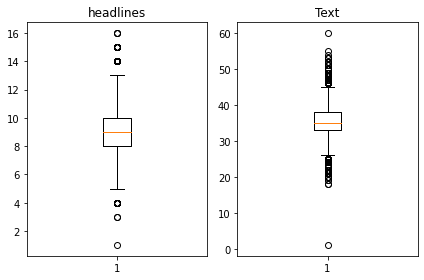

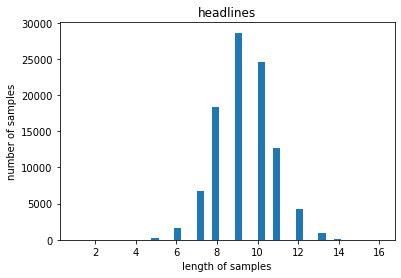

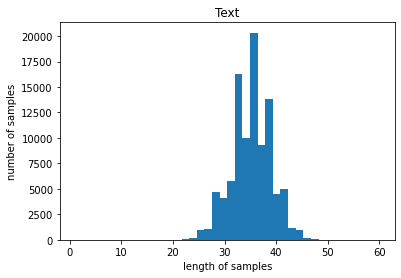

In [16]:
# Í∏∏Ïù¥ Î∂ÑÌè¨ Ï∂úÎ†•
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('ÌÖçÏä§Ìä∏Ïùò ÏµúÏÜå Í∏∏Ïù¥ : {}'.format(np.min(text_len)))
print('ÌÖçÏä§Ìä∏Ïùò ÏµúÎåÄ Í∏∏Ïù¥ : {}'.format(np.max(text_len)))
print('ÌÖçÏä§Ìä∏Ïùò ÌèâÍ∑† Í∏∏Ïù¥ : {}'.format(np.mean(text_len)))
print('ÏöîÏïΩÏùò ÏµúÏÜå Í∏∏Ïù¥ : {}'.format(np.min(headlines_len)))
print('ÏöîÏïΩÏùò ÏµúÎåÄ Í∏∏Ïù¥ : {}'.format(np.max(headlines_len)))
print('ÏöîÏïΩÏùò ÌèâÍ∑† Í∏∏Ïù¥ : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('Text')
plt.tight_layout()
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [17]:
text_max_len = 40
headlines_max_len = 10

In [18]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s.split()) <= max_len):
            cnt = cnt + 1
    print('Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä %s Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®: %s'%(max_len, (cnt / len(nested_list))))

In [19]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(headlines_max_len,  data['headlines'])

Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä 40 Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®: 0.9238714924766165
Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Í∏∏Ïù¥Í∞Ä 10 Ïù¥ÌïòÏù∏ ÏÉòÌîåÏùò ÎπÑÏú®: 0.8162972753151687


In [20]:
data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]
print('Ï†ÑÏ≤¥ ÏÉòÌîåÏàò :', (len(data)))

Ï†ÑÏ≤¥ ÏÉòÌîåÏàò : 74102


In [21]:
# ÏöîÏïΩ Îç∞Ïù¥ÌÑ∞ÏóêÎäî ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞ÏùÑ Ï∂îÍ∞ÄÌïúÎã§.
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

headlines  \
2   new zealand end rohit sharma led india match w...   
3   aegon life iterm insurance plan helps customer...   
5   rahat fateh ali khan denies getting notice for...   
9   cong wins ramgarh bypoll in rajasthan takes to...   
10  up cousins fed human excreta for friendship wi...   

                                                 text  \
2   new zealand defeated india wickets fourth odi ...   
3   aegon life iterm insurance plan customers enjo...   
5   pakistani singer rahat fateh ali khan denied r...   
9   congress candidate shafia zubair ramgarh assem...   
10  two minor cousins uttar pradesh gorakhpur alle...   

                                        decoder_input  \
2   sostoken new zealand end rohit sharma led indi...   
3   sostoken aegon life iterm insurance plan helps...   
5   sostoken rahat fateh ali khan denies getting n...   
9   sostoken cong wins ramgarh bypoll in rajasthan...   
10  sostoken up cousins fed human excreta for frie...   

                                       decoder_target  
2   new zealand end rohit sharma led india match w...  
3   aegon life iterm insurance plan helps customer...  
5   rahat fateh ali khan denies getting notice for...  
9   cong wins ramgarh bypoll in rajasthan takes to...  
10  up cousins fed human excreta for friendship wi...

In [22]:
encoder_input = np.array(data['text']) # Ïù∏ÏΩîÎçîÏùò ÏûÖÎ†•
decoder_input = np.array(data['decoder_input']) # ÎîîÏΩîÎçîÏùò ÏûÖÎ†•
decoder_target = np.array(data['decoder_target']) # ÎîîÏΩîÎçîÏùò Î†àÏù¥Î∏î

In [23]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[55214 71041 24136 ... 28433 41994 14219]


In [24]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [25]:
n_of_val = int(len(encoder_input)*0.2)
print('ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ïàò :', n_of_val)

ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ïàò : 14820


In [26]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò :', len(encoder_input_train))
print('ÌõàÎ†® Î†àÏù¥Î∏îÏùò Í∞úÏàò :', len(decoder_input_train))
print('ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò :', len(encoder_input_test))
print('ÌÖåÏä§Ìä∏ Î†àÏù¥Î∏îÏùò Í∞úÏàò :', len(decoder_input_test))

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò : 59282
ÌõàÎ†® Î†àÏù¥Î∏îÏùò Í∞úÏàò : 59282
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò : 14820
ÌÖåÏä§Ìä∏ Î†àÏù¥Î∏îÏùò Í∞úÏàò : 14820


### 3-2. Ï†ïÏàò Ïù∏ÏΩîÎî©

In [27]:
src_tokenizer = Tokenizer() # ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Ï†ïÏùò
src_tokenizer.fit_on_texts(encoder_input_train) # ÏûÖÎ†•Îêú Îç∞Ïù¥ÌÑ∞Î°úÎ∂ÄÌÑ∞ Îã®Ïñ¥ ÏßëÌï© ÏÉùÏÑ±

In [28]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # Îã®Ïñ¥Ïùò Ïàò
rare_cnt = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Í∞úÏàòÎ•º Ïπ¥Ïö¥Ìä∏
total_freq = 0 # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤¥ Îã®Ïñ¥ ÎπàÎèÑÏàò Ï¥ù Ìï©
rare_freq = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÏùò Ï¥ù Ìï©

# Îã®Ïñ¥ÏôÄ ÎπàÎèÑÏàòÏùò Ïåç(pair)ÏùÑ keyÏôÄ valueÎ°ú Î∞õÎäîÎã§.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏúºÎ©¥
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ :', total_cnt)
print('Îì±Ïû• ÎπàÎèÑÍ∞Ä %sÎ≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: %s'%(threshold - 1, rare_cnt))
print('Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Î•º Ï†úÏô∏ÏãúÌÇ¨ Í≤ΩÏö∞Ïùò Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ %s'%(total_cnt - rare_cnt))
print("Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®:", (rare_cnt / total_cnt)*100)
print("Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®:", (rare_freq / total_freq)*100)

Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ : 61465
Îì±Ïû• ÎπàÎèÑÍ∞Ä 6Î≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: 42159
Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Î•º Ï†úÏô∏ÏãúÌÇ¨ Í≤ΩÏö∞Ïùò Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ 19306
Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®: 68.59025461644839
Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®: 4.1925566603579245


In [29]:
src_vocab = 8000
src_tokenizer = Tokenizer(num_words=src_vocab) # Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞Î•º 8,000ÏúºÎ°ú Ï†úÌïú
src_tokenizer.fit_on_texts(encoder_input_train) # Îã®Ïñ¥ ÏßëÌï© Ïû¨ÏÉùÏÑ±.

In [30]:
# ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§Î•º Ï†ïÏàò ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôò
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# Ïûò ÏßÑÌñâÎêòÏóàÎäîÏßÄ ÏÉòÌîå Ï∂úÎ†•
print(encoder_input_train[:3])

[[337, 20, 8, 756, 21, 574, 583, 2418, 1284, 6526, 323, 1306, 2533, 798, 152, 215, 1284, 6526, 195, 1639, 1838, 603, 291, 2418, 4853, 6645, 3157, 96, 3269], [11, 206, 7671, 774, 2304, 4225, 4045, 74, 52, 419, 230, 415, 7, 296, 1, 3158, 11, 84, 302, 140, 324, 914, 4225, 4045, 485, 11, 106, 6, 74, 157], [1190, 53, 1644, 144, 686, 187, 937, 1377, 5019, 187, 6, 11, 352, 19, 540, 168, 187, 110, 25, 157, 141, 144, 5571, 3593, 1687]]


In [31]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [32]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # Îã®Ïñ¥Ïùò Ïàò
rare_cnt = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Í∞úÏàòÎ•º Ïπ¥Ïö¥Ìä∏
total_freq = 0 # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤¥ Îã®Ïñ¥ ÎπàÎèÑÏàò Ï¥ù Ìï©
rare_freq = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÏùò Ï¥ù Ìï©

# Îã®Ïñ¥ÏôÄ ÎπàÎèÑÏàòÏùò Ïåç(pair)ÏùÑ keyÏôÄ valueÎ°ú Î∞õÎäîÎã§.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏúºÎ©¥
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ :', total_cnt)
print('Îì±Ïû• ÎπàÎèÑÍ∞Ä %sÎ≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: %s'%(threshold - 1, rare_cnt))
print('Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Î•º Ï†úÏô∏ÏãúÌÇ¨ Í≤ΩÏö∞Ïùò Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ %s'%(total_cnt - rare_cnt))
print("Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®:", (rare_cnt / total_cnt)*100)
print("Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®:", (rare_freq / total_freq)*100)

Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ : 27228
Îì±Ïû• ÎπàÎèÑÍ∞Ä 5Î≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: 18168
Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Î•º Ï†úÏô∏ÏãúÌÇ¨ Í≤ΩÏö∞Ïùò Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ 9060
Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®: 66.72542970471574
Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®: 5.953974234905732


In [33]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§Î•º Ï†ïÏàò ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôò
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# Ïûò Î≥ÄÌôòÎêòÏóàÎäîÏßÄ ÌôïÏù∏
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 250, 3, 73, 401, 973, 1863, 890, 908], [1, 171, 710, 60, 4], [1, 850, 201, 32, 1944, 10, 43], [1, 981, 1467, 3, 13, 538], [1, 171, 1298, 446, 6, 1271, 11, 260]]
target
decoder  [[250, 3, 73, 401, 973, 1863, 890, 908, 2], [171, 710, 60, 4, 2], [850, 201, 32, 1944, 10, 43, 2], [981, 1467, 3, 13, 538, 2], [171, 1298, 446, 6, 1271, 11, 260, 2]]


In [36]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('ÏÇ≠Ï†úÌï† ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò :', len(drop_train))
print('ÏÇ≠Ï†úÌï† ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò :', len(drop_test))

encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print('ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò :', len(encoder_input_train))
print('ÌõàÎ†® Î†àÏù¥Î∏îÏùò Í∞úÏàò :', len(decoder_input_train))
print('ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò :', len(encoder_input_test))
print('ÌÖåÏä§Ìä∏ Î†àÏù¥Î∏îÏùò Í∞úÏàò :', len(decoder_input_test))

ÏÇ≠Ï†úÌï† ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò : 0
ÏÇ≠Ï†úÌï† ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò : 0
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò : 59272
ÌõàÎ†® Î†àÏù¥Î∏îÏùò Í∞úÏàò : 59272
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàò : 14819
ÌÖåÏä§Ìä∏ Î†àÏù¥Î∏îÏùò Í∞úÏàò : 14819


In [38]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')

### 3-2. Î™®Îç∏ ÏÑ§Í≥ÑÌïòÍ∏∞

In [45]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Ïù∏ÏΩîÎçî ÏÑ§Í≥Ñ ÏãúÏûë
embedding_dim = 128
hidden_size = 256

# Ïù∏ÏΩîÎçî
encoder_inputs = Input(shape=(text_max_len,))

# Ïù∏ÏΩîÎçîÏùò ÏûÑÎ≤†Îî© Ï∏µ
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# Ïù∏ÏΩîÎçîÏùò LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# Ïù∏ÏΩîÎçîÏùò LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# Ïù∏ÏΩîÎçîÏùò LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [47]:
# ÎîîÏΩîÎçî ÏÑ§Í≥Ñ
decoder_inputs = Input(shape=(None,))

# ÎîîÏΩîÎçîÏùò ÏûÑÎ≤†Îî© Ï∏µ
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# ÎîîÏΩîÎçîÏùò LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

ÎîîÏΩîÌÑ∞ Ï∂úÎ†•Ï∏µÏóêÎäî tar_vocabÏùò ÏÑ†ÌÉùÏßÄÏ§ë ÌïòÎÇòÏùò Îã®Ïñ¥Î•º Í≥†Î•¥Îäî Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•òÎ¨∏Ï†úÍ∏∞ÎïåÎ¨∏Ïóê softmaxÌï®ÏàòÎ•º ÏÇ¨Ïö©ÌïúÎã§.

In [48]:
# ÎîîÏΩîÎçîÏùò Ï∂úÎ†•Ï∏µ
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# Î™®Îç∏ Ï†ïÏùò
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 40, 128)      1024000     input_3[0][0]                    
__________________________________________________________________________________________________
lstm_4 (LSTM)                   [(None, 40, 256), (N 394240      embedding_2[0][0]                
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

ÎîîÏΩîÎçîÏ∏µÏóê Ïñ¥ÌÖêÏÖò Î©îÏª§ÎãàÏ¶òÏùÑ Í≤∞Ìï©ÌïúÎã§.

In [49]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

In [50]:
# Ïñ¥ÌÖêÏÖò Ï∏µ(Ïñ¥ÌÖêÏÖò Ìï®Ïàò)
attn_layer = AttentionLayer(name='attention_layer')
# Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçîÏùò Î™®Îì† time stepÏùò hidden stateÎ•º Ïñ¥ÌÖêÏÖò Ï∏µÏóê Ï†ÑÎã¨ÌïòÍ≥† Í≤∞Í≥ºÎ•º Î¶¨ÌÑ¥
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Ïñ¥ÌÖêÏÖòÏùò Í≤∞Í≥ºÏôÄ ÎîîÏΩîÎçîÏùò hidden stateÎì§ÏùÑ Ïó∞Í≤∞
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# ÎîîÏΩîÎçîÏùò Ï∂úÎ†•Ï∏µ
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# Î™®Îç∏ Ï†ïÏùò
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 40, 128)      1024000     input_3[0][0]                    
__________________________________________________________________________________________________
lstm_4 (LSTM)                   [(None, 40, 256), (N 394240      embedding_2[0][0]                
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

In [51]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
232/232 [==============================] - 53s 193ms/step - loss: 4.7609 - val_loss: 4.1147
Epoch 2/50
232/232 [==============================] - 44s 188ms/step - loss: 4.0558 - val_loss: 3.7672
Epoch 3/50
232/232 [==============================] - 44s 188ms/step - loss: 3.7142 - val_loss: 3.5576
Epoch 4/50
232/232 [==============================] - 44s 188ms/step - loss: 3.4948 - val_loss: 3.4060
Epoch 5/50
232/232 [==============================] - 44s 189ms/step - loss: 3.3211 - val_loss: 3.2936
Epoch 6/50
232/232 [==============================] - 44s 189ms/step - loss: 3.1760 - val_loss: 3.1814
Epoch 7/50
232/232 [==============================] - 44s 189ms/step - loss: 3.0536 - val_loss: 3.1072
Epoch 8/50
232/232 [==============================] - 44s 189ms/step - loss: 2.9347 - val_loss: 3.0498
Epoch 9/50
232/232 [==============================] - 44s 189ms/step - loss: 2.8412 - val_loss: 3.0020
Epoch 10/50
232/232 [==============================] - 44s 189ms/step - l

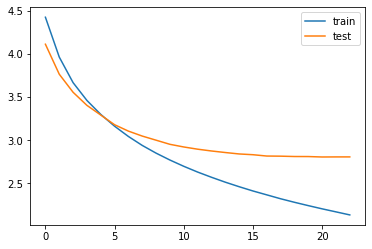

In [52]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Step 4. Ïã§Ï†ú Í≤∞Í≥ºÏôÄ ÏöîÏïΩÎ¨∏ ÎπÑÍµêÌïòÍ∏∞ (Ï∂îÏÉÅÏ†Å ÏöîÏïΩ)

In [53]:
src_index_to_word = src_tokenizer.index_word # ÏõêÎ¨∏ Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ï†ïÏàò -> Îã®Ïñ¥Î•º ÏñªÏùå
tar_word_to_index = tar_tokenizer.word_index # ÏöîÏïΩ Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Îã®Ïñ¥ -> Ï†ïÏàòÎ•º ÏñªÏùå
tar_index_to_word = tar_tokenizer.index_word # ÏöîÏïΩ Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ï†ïÏàò -> Îã®Ïñ¥Î•º ÏñªÏùå

In [54]:
# Ïù∏ÏΩîÎçî ÏÑ§Í≥Ñ
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# Ïù¥Ï†Ñ ÏãúÏ†êÏùò ÏÉÅÌÉúÎì§ÏùÑ Ï†ÄÏû•ÌïòÎäî ÌÖêÏÑú
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# Î¨∏Ïû•Ïùò Îã§Ïùå Îã®Ïñ¥Î•º ÏòàÏ∏°ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Ï¥àÍ∏∞ ÏÉÅÌÉú(initial_state)Î•º Ïù¥Ï†Ñ ÏãúÏ†êÏùò ÏÉÅÌÉúÎ°ú ÏÇ¨Ïö©. Ïù¥Îäî Îí§Ïùò Ìï®Ïàò decode_sequence()Ïóê Íµ¨ÌòÑ
# ÌõàÎ†® Í≥ºÏ†ïÏóêÏÑúÏôÄ Îã¨Î¶¨ LSTMÏùò Î¶¨ÌÑ¥ÌïòÎäî ÏùÄÎãâ ÏÉÅÌÉúÏôÄ ÏÖÄ ÏÉÅÌÉúÏù∏ state_hÏôÄ state_cÎ•º Î≤ÑÎ¶¨ÏßÄ ÏïäÏùå.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [55]:
# Ïñ¥ÌÖêÏÖò Ìï®Ïàò
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# ÎîîÏΩîÎçîÏùò Ï∂úÎ†•Ï∏µ
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# ÏµúÏ¢Ö ÎîîÏΩîÎçî Î™®Îç∏
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [61]:
def decode_sequence(input_seq):
    # ÏûÖÎ†•ÏúºÎ°úÎ∂ÄÌÑ∞ Ïù∏ÏΩîÎçîÏùò ÏÉÅÌÉúÎ•º ÏñªÏùå
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>Ïóê Ìï¥ÎãπÌïòÎäî ÌÜ†ÌÅ∞ ÏÉùÏÑ±
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_conditionÏù¥ TrueÍ∞Ä Îê† ÎïåÍπåÏßÄ Î£®ÌîÑ Î∞òÎ≥µ

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>Ïóê ÎèÑÎã¨ÌïòÍ±∞ÎÇò ÏµúÎåÄ Í∏∏Ïù¥Î•º ÎÑòÏúºÎ©¥ Ï§ëÎã®.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # Í∏∏Ïù¥Í∞Ä 1Ïù∏ ÌÉÄÍ≤ü ÏãúÌÄÄÏä§Î•º ÏóÖÎç∞Ïù¥Ìä∏
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # ÏÉÅÌÉúÎ•º ÏóÖÎç∞Ïù¥Ìä∏ Ìï©ÎãàÎã§.
        e_h, e_c = h, c

    return decoded_sentence

In [62]:
# ÏõêÎ¨∏Ïùò Ï†ïÏàò ÏãúÌÄÄÏä§Î•º ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôò
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# ÏöîÏïΩÎ¨∏Ïùò Ï†ïÏàò ÏãúÌÄÄÏä§Î•º ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôò
def seq2headlines(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [63]:
for i in range(50, 100):
    print("ÏõêÎ¨∏ :", seq2text(encoder_input_test[i]))
    print("Ïã§Ï†ú ÏöîÏïΩ :", seq2headlines(decoder_input_test[i]))
    print("ÏòàÏ∏° ÏöîÏïΩ :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

ÏõêÎ¨∏ : teacher school terminated work told class student times completing boy father alleged boy looking depressed go school past told family incident much 
Ïã§Ï†ú ÏöîÏïΩ : class student times for not 
ÏòàÏ∏° ÏöîÏïΩ :  class boy makes to school


ÏõêÎ¨∏ : uttar pradesh oldest prisoner year old yadav released thursday serving years jail year old murder case freed recommendation previous samajwadi party government governor ram naik using constitutional powers yadav release proposed sp government january 
Ïã§Ï†ú ÏöîÏïΩ : year old uttar pradesh oldest from jail 
ÏòàÏ∏° ÏöîÏïΩ :  jharkhand records year old becomes


ÏõêÎ¨∏ : toddler rescued wednesday deep wherein stuck foot andhra pradesh nearly hours operation launched two year old handed farmer parents authorities doctors healthy post first aid government ambulance stationed spot 
Ïã§Ï†ú ÏöîÏïΩ : andhra rescued hours after into 
ÏòàÏ∏° ÏöîÏïΩ :  rescued from odisha hospital


ÏõêÎ¨∏ : sports ministry included former indian cricketer vir

## Step 5. SummaÏùÑ Ïù¥Ïö©Ìï¥ÏÑú Ï∂îÏ∂úÏ†Å ÏöîÏïΩÌï¥Î≥¥Í∏∞

In [105]:
import requests
from summa.summarizer import summarize

In [135]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data2 = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [139]:
data2['text'][0]

"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers."

In [147]:
print('Summary:')
print(summarize(data2['text'][0], ratio=0.2))

Summary:



In [148]:
print('Summary:')
print(summarize(data2['text'][0], ratio=0.4))

Summary:
upGrad's Online Power Learning has powered 3 lakh+ careers.


In [149]:
print('Summary:')
print(summarize(data2['text'][0], ratio=0.9))

Summary:
The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike.
upGrad's Online Power Learning has powered 3 lakh+ careers.


## üí° ÌöåÍ≥†

> - Ï∂îÏ∂úÏ†Å ÏöîÏïΩ(Extractive Summarization) : ÏõêÎ¨∏ÏóêÏÑú Î¨∏Ïû•Îì§ÏùÑ Ï∂îÏ∂úÌï¥ÏÑú ÏöîÏïΩÌïòÎäî Î∞©Ïãù. Îî• Îü¨Îãù Î≥¥Îã§Îäî Ï£ºÎ°ú Ï†ÑÌÜµÏ†ÅÏù∏ Î®∏Ïã† Îü¨Îãù Î∞©ÏãùÏóê ÏÜçÌïòÎäî ÌÖçÏä§Ìä∏ Îû≠ÌÅ¨ÏôÄ Í∞ôÏùÄ ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú Ïù¥ Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïúÎã§.
> - Ï∂îÏÉÅÏ†Å ÏöîÏïΩ(Abstractive Summarization) : ÏõêÎ¨∏ÏúºÎ°úÎ∂ÄÌÑ∞ ÎÇ¥Ïö©Ïù¥ ÏöîÏïΩÎêú ÏÉàÎ°úÏö¥ Î¨∏Ïû•ÏùÑ ÏÉùÏÑ±Ìï¥ÎÇ¥Îäî Í≤É. ÏûêÏó∞Ïñ¥ ÏÉùÏÑ±Ïùò ÏòÅÏó≠Ïù¥Îã§.

> - ÏûêÏó∞Ïñ¥Ïùò Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ïÏóêÏÑú Îç∞Ïù¥ÌÑ∞Ïùò Í∏∏Ïù¥Î•º ÏãúÍ∞ÅÌôî Ìï¥ÏÑú Î¥§ÏùÑÎïå Ï¢ÄÎçî ÏßÅÍ¥ÄÏ†ÅÏù∏ Í∞íÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§.
> - ÎîîÏΩîÎçîÏùò ÏûÖÎ†•Í≥º Î†àÏù¥Î∏îÏóê ÏãúÏûëÌÜ†ÌÅ∞(sostoken), Ï¢ÖÎ£å ÌÜ†ÌÅ∞(eostoken)ÏùÑ ÏïûÎí§Î°ú Ï∂îÍ∞ÄÌïúÎã§.
> - ÏûÑÍ≥ÑÍ∞íÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÎÇÆÏùÄ Îì±Ïû• ÎπàÎèÑÏùò Îã®Ïñ¥Îì§ÏùÑ Ïù∏ÏΩîÎî©Í≥ºÏ†ïÏóêÏÑú ÎπºÍ≥† ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï†úÍ±∞ÌïúÎã§.
> - Ïù∏ÏΩîÎçîÏùò hidden stateÎì§Í≥º ÎîîÏΩîÎçîÏùò hidden stateÎì§ÏùÑ Ïñ¥ÌÖêÏÖò Ìï®ÏàòÏùò ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©ÌïòÍ≥†, Ïñ¥ÌÖêÏÖò Ìï®ÏàòÍ∞Ä Î¶¨ÌÑ¥Ìïú Í∞íÏùÑ ÏòàÏ∏° ÏãúÏóê ÎîîÏΩîÎçîÏùò hidden stateÏôÄ Ìï®Íªò ÌôúÏö©ÌïòÎäî ÌòïÌÉúÎ°ú ÏûëÎèôÌïúÎã§.